In [86]:
import yaml
import torch
%load_ext autoreload
from aircraft_env import Location
from aircraft_env import AircraftEnv
%autoreload 2
from ddqn_agent.ddqn_model import LinearDDQNModel
from agents.dqn_model import Net
from ddqn_agent.ddqn_agent import DQNAgent

with open('ddqn_agent/config.yaml') as f:
    templates = yaml.safe_load(f)
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
loc_1, loc_2
env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)
agent = DQNAgent(templates, env=env, model_type=LinearDDQNModel)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Began Training!:   0%|          | 0/30000 [00:00<?, ?it/s]

Actions Number 150


In [87]:
agent.train()

Episode: 29999 | Episode Reward 1751| Epsilone: 0.197 | Loss: 2930625.25: 100%|██████████| 30000/30000 [05:53<00:00, 84.86it/s] 


In [83]:
agent.all_rewards[-10:]

[885.0296509410384,
 -30000,
 -30000,
 856.1875680468045,
 880.6582733332671,
 839.1706851677475,
 944.0711852697805,
 -30000,
 856.1875680468045,
 880.6582733332671]

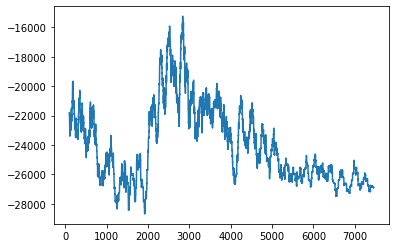

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot((pd.Series(agent.rewards)).rolling(window=100).mean())

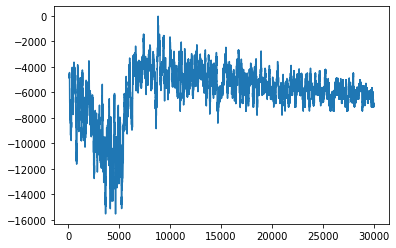

In [85]:
plt.plot((pd.Series(agent.all_rewards)).rolling(window=100).mean())

In [49]:
from utils.env_extra import env_summary
df = env_summary(env, agent)
df

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,1,1,238.191493,234.466093,694412.346818,3.930965,71.027558,52.567879,-0.304163,10609.6,2915.353263,1169.139750,2915.353263,-1169.139750,0.4010285012751503
2,1,2,231.092197,233.104900,692673.413059,2.135966,261.850609,62.202200,0.176533,11219.2,2997.389886,1139.558041,5912.743149,-1139.558041,0.38018345426304617
3,1,3,229.725547,233.104900,692673.930453,13.545263,326.163992,68.981095,3.248127,11828.8,3015.223772,1089.969103,8927.966921,-1089.969103,0.361488627398956
4,1,4,228.867474,233.104900,692674.248907,38.774459,168.151850,76.685708,-9.571870,12438.4,3026.529880,1044.271520,11954.496801,-31044.271520,0.34503922346001603
5,1,5,204.614449,233.104900,692674.364566,43.721879,211.240506,85.072441,-8.709093,13048.0,3385.266135,1119.945732,15339.762936,-31119.945732,0.33082944947439624
6,1,6,214.101044,233.104900,692674.276029,19.104725,279.880104,93.733036,0.502840,13657.6,3235.268097,1031.607264,18575.031033,-31031.607264,0.31886299173819804
7,1,7,235.458694,233.104900,740511.322587,7.828844,176.332651,104.740468,-1.826132,14267.2,3144.973376,972.282669,21720.004409,-30972.282669,0.30915449919653804
8,1,8,254.400838,233.104900,645768.368437,23.234822,134.395809,111.892295,-2.186351,14876.8,2538.389314,765.910920,24258.393723,-30765.910920,0.3017310683157285


In [50]:
df['fuel_burn'].sum()

8332.684997563885